In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact,  FloatSlider

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, classification_report

# from imblearn.under_sampling import TomekLinks
# from imblearn.over_sampling import SMOTE

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
import pickle

In [4]:
import numpy
print (numpy.__version__)

1.20.3


In [5]:
import pandas as pd 
print (pd.__version__)

1.3.2


In [6]:
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100
pd.options.display.width=100
plt.style.use('ggplot')

In [7]:
df= pd.read_csv("C:\\Users\\GAURAV\\PycharmProjects\\creditcardrev1\\prediction_module\\creditcard.csv")

In [8]:
# !pip install pandas-profiling

# from pandas_profiling import ProfileReport
# profile = ProfileReport(df)
# print(profile)

# pf= ProfileReport(df)

# pf.to_widgets()


In [9]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [10]:
#Dataset
pd.set_option("display.max_columns",None)

df.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,-0.284708,-0.612982,-0.066655,-0.732987,0.237948,-0.293959,-0.245496,-0.174846,-0.891169,-0.290491,-0.139512,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,-0.111640,-1.109232,-0.453235,-1.046946,1.122674,1.243518,-1.431897,0.939328,-0.002373,2.894952,0.006666,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,-0.594242,-1.264072,0.453596,-0.243142,-0.858719,-0.766554,-0.644646,0.447184,0.388721,0.792135,0.348176,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,0.267772,0.523316,0.559047,-0.834660,0.626211,-0.541494,0.225361,-0.605252,-0.163049,0.561695,-0.256922,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,-0.657422,0.644837,0.190916,-0.546329,-0.731707,-0.808036,0.599628,0.070441,0.373110,0.128904,0.000676,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [11]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Data Preprocessing

In [14]:
#checking the null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [16]:
legitimate = df[df.Class == 0]
fraud = df[df.Class != 0]

In [17]:
legitimate.shape

(284315, 31)

In [18]:
fraud.shape

(492, 31)

In [19]:
legitimate.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [20]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [21]:
#comparing the values between these two classs
df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [22]:
legitimate_sample = legitimate.sample(n=492)

In [23]:
legitimate_sample.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33304,37181.0,-1.027912,0.198211,0.690291,-1.147883,-0.882132,-0.729389,0.309888,-1.007741,-0.674892,-0.085523,-0.644280,-1.780460,-1.742497,-1.207810,-0.182675,1.258208,1.285402,-0.899989,0.540420,-0.531098,0.696900,-0.224795,0.343573,0.247031,-0.345244,-0.454258,0.107462,0.066802,110.00,0
191323,129208.0,-0.207377,0.845959,0.701995,-0.387056,0.532740,-0.885506,1.059787,-0.224212,-0.392008,-0.606842,-1.082580,-0.148647,-0.182894,0.257594,-0.055851,-0.282398,-0.219367,-0.566986,0.613494,-0.054682,-0.206348,-0.556282,-0.049340,-0.107908,-0.460428,0.246624,0.085564,0.150063,9.99,0
59569,48901.0,1.230975,-0.008825,-1.212729,0.088442,2.165983,3.394033,-0.409092,0.791651,-0.150498,0.111727,-0.190311,0.001107,0.008033,0.473748,1.127415,0.479420,-0.972205,0.380426,-0.112117,0.044606,0.035451,-0.067004,-0.171613,1.009134,0.822406,-0.268647,0.014937,0.020556,34.55,0
140345,83671.0,-2.810614,-1.255934,0.534252,1.833196,1.266633,-0.336898,-0.524892,0.566502,-0.583604,0.012125,0.826729,1.518163,0.901882,0.390380,-0.398843,-0.723934,0.381441,-0.170178,1.148843,0.058401,0.029318,0.150226,-0.861510,-0.163730,-0.210010,-0.245811,0.605932,-0.486416,108.86,0
33131,37103.0,-0.921732,0.080744,1.200659,-2.217900,0.100078,-1.544628,0.855621,-0.332452,-1.523350,-0.185431,-0.659959,-0.033024,0.549837,-0.053663,-0.588491,-0.862209,-0.626552,0.259837,-2.032518,-0.629380,-0.695604,-1.707935,0.316327,0.333977,-0.392004,0.269469,-0.127938,0.120846,31.95,0
20779,31266.0,-0.861456,0.503033,2.201382,-2.371305,-0.275900,-0.340475,0.144616,0.139905,1.180344,-1.693379,-1.082424,0.446207,1.020704,-0.517372,1.490330,0.488013,-1.181716,0.968257,-0.345497,0.127306,0.227341,0.855572,-0.530026,-0.420502,0.738067,-0.608142,0.359031,0.135801,8.49,0
126306,77980.0,1.161791,-0.367555,0.925110,-0.902328,-0.865198,-0.002133,-0.678335,0.189793,1.390632,-0.987593,1.667776,2.102590,0.961462,-0.144217,0.702423,-0.589649,-0.181461,0.099295,0.480703,-0.075441,0.079525,0.531279,-0.032214,0.072197,0.435061,-0.677877,0.113543,0.024055,1.00,0
222007,142784.0,1.941235,0.445247,-0.986731,3.668193,0.906886,0.736822,0.137573,-0.015434,-0.711769,1.344535,-2.053754,0.000617,0.791845,-0.213939,-1.512864,0.658405,-0.845730,-0.336767,-1.061154,-0.172824,0.039768,0.262692,0.001224,0.048509,0.270943,0.103101,-0.030649,-0.046565,23.55,0
112294,72598.0,-1.460082,2.643644,-0.571678,1.577759,0.903114,-0.966347,0.386211,-1.344583,-1.434326,-1.981530,1.213843,-0.142794,0.310893,-3.091740,1.587581,0.270651,3.789559,1.073317,-0.163133,-0.288757,1.462371,-0.679895,-0.219715,0.078310,0.590624,-0.091093,0.111385,0.062372,7.99,0
220396,142150.0,1.927644,-0.383221,0.180118,0.615024,-1.237679,-1.110810,-0.576140,-0.185600,1.066632,-0.036132,-0.002999,1.211752,1.069643,-0.436047,0.172164,0.000301,-0.204401,-0.399992,-0.605366,-0.142742,0.284518,1.100119,0.228957,1.035195,-0.339609,0.680412,-0.019971,-0.037836,11.59,0


In [24]:
new_df = pd.concat([legitimate_sample, fraud], axis=0)

In [25]:
new_df.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,-0.888722,0.491140,0.728903,0.380428,-1.948883,-0.832498,0.519436,0.903562,1.197315,0.593509,-0.017652,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [26]:
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [27]:
new_df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,94015.804878,0.027383,0.054450,-0.042840,-0.036270,-0.089624,-0.035186,-0.039748,0.034509,0.013750,0.022106,-0.044369,0.012812,-0.030956,-0.012930,0.053349,0.058780,0.068647,-0.041261,0.037968,-0.014249,-0.002213,0.000994,0.003544,0.000282,0.022632,-0.004379,-0.025974,-0.002162,79.202195
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [28]:
"This shows that we got a good sample because we can clearly see that the mean values for both the legit and fraud are same as in the total dataset"

'This shows that we got a good sample because we can clearly see that the mean values for both the legit and fraud are same as in the total dataset'

# Feature Selection

In [61]:
import itertools

In [29]:
X = new_df.drop(columns = "Class", axis =1)

In [30]:
Y = new_df["Class"]

In [31]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
33304,37181.0,-1.027912,0.198211,0.690291,-1.147883,-0.882132,-0.729389,0.309888,-1.007741,-0.674892,-0.085523,-0.644280,-1.780460,-1.742497,-1.207810,-0.182675,1.258208,1.285402,-0.899989,0.540420,-0.531098,0.696900,-0.224795,0.343573,0.247031,-0.345244,-0.454258,0.107462,0.066802,110.00
191323,129208.0,-0.207377,0.845959,0.701995,-0.387056,0.532740,-0.885506,1.059787,-0.224212,-0.392008,-0.606842,-1.082580,-0.148647,-0.182894,0.257594,-0.055851,-0.282398,-0.219367,-0.566986,0.613494,-0.054682,-0.206348,-0.556282,-0.049340,-0.107908,-0.460428,0.246624,0.085564,0.150063,9.99
59569,48901.0,1.230975,-0.008825,-1.212729,0.088442,2.165983,3.394033,-0.409092,0.791651,-0.150498,0.111727,-0.190311,0.001107,0.008033,0.473748,1.127415,0.479420,-0.972205,0.380426,-0.112117,0.044606,0.035451,-0.067004,-0.171613,1.009134,0.822406,-0.268647,0.014937,0.020556,34.55
140345,83671.0,-2.810614,-1.255934,0.534252,1.833196,1.266633,-0.336898,-0.524892,0.566502,-0.583604,0.012125,0.826729,1.518163,0.901882,0.390380,-0.398843,-0.723934,0.381441,-0.170178,1.148843,0.058401,0.029318,0.150226,-0.861510,-0.163730,-0.210010,-0.245811,0.605932,-0.486416,108.86
33131,37103.0,-0.921732,0.080744,1.200659,-2.217900,0.100078,-1.544628,0.855621,-0.332452,-1.523350,-0.185431,-0.659959,-0.033024,0.549837,-0.053663,-0.588491,-0.862209,-0.626552,0.259837,-2.032518,-0.629380,-0.695604,-1.707935,0.316327,0.333977,-0.392004,0.269469,-0.127938,0.120846,31.95


In [32]:
Y.head()

33304     0
191323    0
59569     0
140345    0
33131     0
Name: Class, dtype: int64

In [33]:
# train and test set split
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, stratify = Y , random_state =2)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [36]:
from sklearn.feature_selection import mutual_info_classif

In [37]:
mutual_info = mutual_info_classif(X_train, Y_train)
mutual_info

array([1.42283188e-01, 2.10728954e-01, 2.76833790e-01, 3.34184797e-01,
       3.76483137e-01, 1.65354718e-01, 1.93605862e-01, 2.92884072e-01,
       1.48931495e-01, 2.22826041e-01, 4.28324633e-01, 3.98250033e-01,
       3.91396142e-01, 3.24698043e-02, 4.91320506e-01, 4.86582482e-03,
       3.72413549e-01, 4.59314175e-01, 2.05912128e-01, 1.15306224e-01,
       9.60141590e-02, 2.26209622e-01, 4.48165356e-04, 8.99873472e-02,
       8.59788135e-02, 5.70447518e-02, 3.86059821e-02, 2.40692318e-01,
       1.88121995e-01, 1.72338587e-01])

In [38]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending = False)

V14       0.491321
V17       0.459314
V10       0.428325
V11       0.398250
V12       0.391396
V4        0.376483
V16       0.372414
V3        0.334185
V7        0.292884
V2        0.276834
V27       0.240692
V21       0.226210
V9        0.222826
V1        0.210729
V18       0.205912
V6        0.193606
V28       0.188122
Amount    0.172339
V5        0.165355
V8        0.148931
Time      0.142283
V19       0.115306
V20       0.096014
V23       0.089987
V24       0.085979
V25       0.057045
V26       0.038606
V13       0.032470
V15       0.004866
V22       0.000448
dtype: float64

<AxesSubplot:>

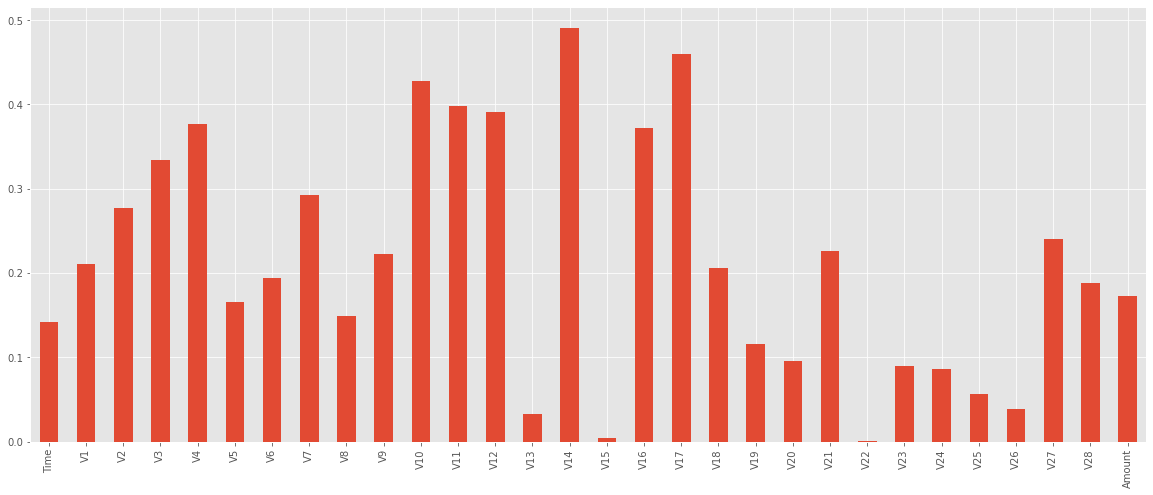

In [39]:
mutual_info.plot.bar(figsize=(20, 8))

<AxesSubplot:>

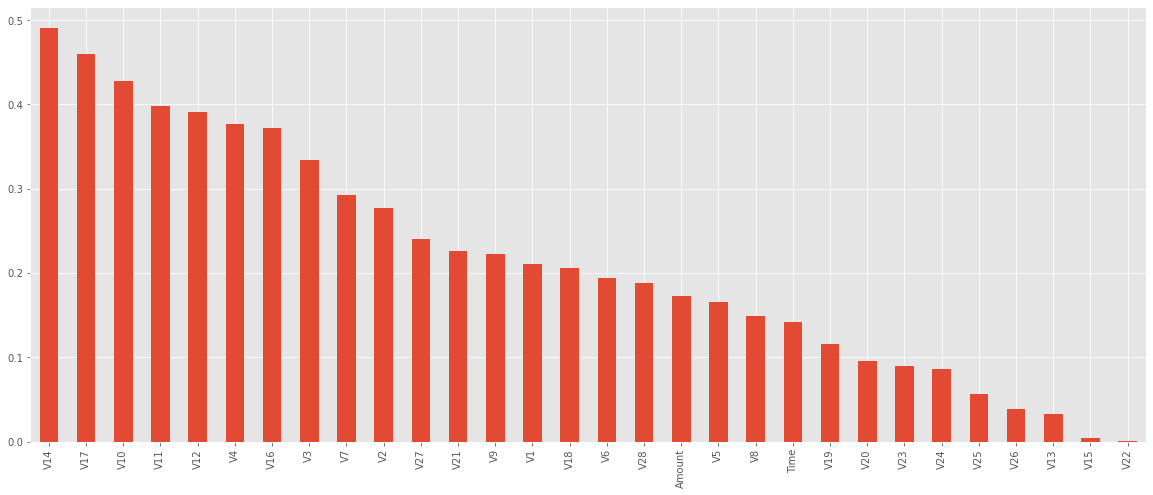

In [40]:
mutual_info.sort_values(ascending = False).plot.bar(figsize=(20, 8))

In [41]:
from sklearn.feature_selection import SelectKBest

In [42]:
# Now we will be selecting top 20 features
sel_five_cols= SelectKBest(mutual_info_classif, k=21)
sel_five_cols.fit(X_train,Y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V14',
       'V16', 'V17', 'V18', 'V21', 'V27', 'V28', 'Amount'],
      dtype='object')

Following are the top features that are important for our model training

In [43]:
#Dropping non significant features
X_train.drop(['V13','V15','V19','V20','V22','V23','V24','V25','V26'], axis=1 , inplace= True)

C:\Users\GAURAV\anaconda3\envs\linearreg2\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [44]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V14,V16,V17,V18,V21,V27,V28,Amount
100623,67571.0,-0.758469,-0.045410,-0.168438,-1.313275,-1.901763,0.739433,3.071892,-0.483422,0.618203,-1.769060,-0.651414,-0.005423,0.217470,-1.173978,0.243347,-0.342301,0.042619,0.150606,-0.117140,549.06
30955,36152.0,-1.353122,0.455521,1.244854,0.287488,-0.614727,-0.462190,0.374922,0.587306,-0.389582,-0.588564,0.743887,0.562045,0.549710,-0.097450,0.101499,0.097221,0.001612,0.153147,0.057562,112.83
189997,128643.0,-0.874118,-0.455838,-0.460966,-0.098508,1.534764,0.063561,0.670237,0.078861,0.527826,-1.226196,0.119917,1.239649,-1.734294,-0.164045,0.506037,0.362741,-0.399276,0.098208,-0.104148,61.42
77548,57098.0,-3.308120,3.081246,0.100481,-0.113641,0.467667,0.490166,1.239848,-0.716977,2.869135,5.287949,1.876096,-0.053202,-1.333502,-1.884915,-0.132597,-0.795326,-0.284155,-1.146946,-1.080598,0.76
201166,133752.0,1.661843,-2.152096,-2.793968,-1.192969,-0.783313,-1.780407,0.591967,-0.829336,-2.121659,1.578555,-0.964960,-1.064906,0.417289,-1.392053,0.838858,-0.322204,0.347685,-0.143641,-0.021384,398.00


# Model training

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [46]:
logistic = LogisticRegression()

In [47]:
logistic.fit(X_train,Y_train)

LogisticRegression()

# Model Evaluation

In [48]:
# checking accuracy of training data

In [49]:
X_train_pred = logistic.predict(X_train)
train_data_accuracy = accuracy_score(X_train_pred, Y_train)

In [50]:
# accuracy of training data
print(train_data_accuracy)

0.9415501905972046


In [51]:
#Removing the unwanted features from the test set
X_test.drop(['V13','V15','V19','V20','V22','V23','V24','V25','V26'], axis=1, inplace= True)

C:\Users\GAURAV\anaconda3\envs\linearreg2\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Model Testing

In [52]:
X_test_pred = logistic.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, Y_test)

In [53]:
print(test_data_accuracy)

0.9137055837563451


In [54]:
import pickle

In [55]:
with open('Credit_Card_pickle','wb') as f:
    pickle.dump(logistic,f)

In [56]:
with open('Credit_Card_pickle','rb') as f:
    classifier = pickle.load(f)

In [57]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [58]:
y_pred= classifier.predict([[1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-0.108300,0.062723,0.061458,123.50]])
y_pred

array([0], dtype=int64)

In [59]:
y_pred=classifier.predict([[472, -3.043540624, -3.157307121, 1.08846278, 2.288643618, 1.35980513, -1.064822523, 0.325574266, -0.067793653, -0.270952836, -0.838586565, -0.414575448, -0.50314086, -1.692028933, 0.666779696, 0.599717414, 1.725321007, 0.661695925, -0.252773123, 0.035764225, 529]])
y_pred


array([1], dtype=int64)

In [87]:
print('Classification Report\n', classification_report(Y_test, X_test_pred))
print('Accuracy: {}%\n'.format(round((accuracy_score(Y_test, X_test_pred)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.89      0.95      0.92        99
           1       0.95      0.88      0.91        98

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197

Accuracy: 91.37%



In [86]:
cm = confusion_matrix(Y_test, X_test_pred)
cm

array([[94,  5],
       [12, 86]], dtype=int64)

# Decision Tree classifier

In [69]:
dt_clf= LogisticRegression()
dt_clf.fit(X_train, Y_train)
y_pred_dct= dt_clf.predict(X_test)
dt_clf.score(X_test,Y_test)

0.9137055837563451

In [65]:
#     X_train, X_test, Y_train, Y_test

In [72]:
print('Classification Report\n', classification_report(Y_test, y_pred_dct))
print('Accuracy: {}%\n'.format(round((accuracy_score(Y_test, y_pred_dct)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.89      0.95      0.92        99
           1       0.95      0.88      0.91        98

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197

Accuracy: 91.37%



In [82]:
cm = confusion_matrix(Y_test, y_pred_dct)
cm

array([[94,  5],
       [12, 86]], dtype=int64)

# Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier

rf_clf= LogisticRegression()
rf_clf.fit(X_train, Y_train)
y_pred_rfc= rf_clf.predict(X_test)
dt_clf.score(X_test,Y_test)

0.9137055837563451

In [77]:
print('Classification Report\n', classification_report(Y_test, y_pred_rfc))
print('Accuracy: {}%\n'.format(round((accuracy_score(Y_test, y_pred_rfc)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.89      0.95      0.92        99
           1       0.95      0.88      0.91        98

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197

Accuracy: 91.37%



In [81]:
cm = confusion_matrix(Y_test, y_pred_rfc)
cm

array([[94,  5],
       [12, 86]], dtype=int64)

# Support Vector Classifier - SVC

In [78]:
from sklearn.svm import SVC

svc_clf= LogisticRegression()
svc_clf.fit(X_train, Y_train)
y_pred_svc= svc_clf.predict(X_test)
svc_clf.score(X_test,Y_test)

0.9137055837563451

In [79]:
print('Classification Report\n', classification_report(Y_test, y_pred_svc))
print('Accuracy: {}%\n'.format(round((accuracy_score(Y_test, y_pred_svc)*100),2)))

Classification Report
               precision    recall  f1-score   support

           0       0.89      0.95      0.92        99
           1       0.95      0.88      0.91        98

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197

Accuracy: 91.37%



In [80]:
cm = confusion_matrix(Y_test, y_pred_svc)
cm

array([[94,  5],
       [12, 86]], dtype=int64)